<a href="https://colab.research.google.com/github/tasneem100/rwfr/blob/main/Copy_of_Generate_Withenhance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/master/Dataset

/content/drive/.shortcut-targets-by-id/1hQ5ihPKGIdbe8qNwKIwtmlj1yytZiiNE/Dataset


In [ ]:
ls

CNN-Dataset/  VGG16-Dataset/


In [ ]:
!pip install np_utils

In [ ]:
import os
import numpy as np
import shutil
import pandas as pd


def train_test_split():
    print("########### Train Test Val Script started ###########")

    root_dir='/content/drive/MyDrive/master/Dataset/VGG16-Dataset/train'
#/content/drive/MyDrive/master/Dataset/VGG16-Dataset/train
    classes_dir=['COVID', 'Normal', 'Viral Pneumonia']

    processed_dir='/content/drive/MyDrive/master/Dataset/VGG16-Dataset/train'
#/content/drive/MyDrive/X-ray_Dataset/Dataset/VGG16-Dataset/train
    val_ratio=0.20
    test_ratio=0.20

    for cls in classes_dir:
        # creating partitions of the data after shuffeling
        print("$$$ Class Name " + cls + "$$$ ")



        src = processed_dir +"/" + cls  # folder to copy images from

        allFileNames=os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames=np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames) * (1 - (val_ratio + test_ratio))),
                                                                   int(len(allFileNames) * (1 - val_ratio)),
                                                                   ])

        train_FileNames=[src + '/' + name for name in train_FileNames.tolist()]
        val_FileNames=[src + '/' + name for name in val_FileNames.tolist()]
        test_FileNames=[src + '/' + name for name in test_FileNames.tolist()]

        print('Total images: '+ str(len(allFileNames)))
        print('Training: '+ str(len(train_FileNames)))
        print('Validation: '+  str(len(val_FileNames)))
        print('Testing: '+ str(len(test_FileNames)))



    print("########### Train Test Val Script Ended ###########")

train_test_split()




########### Train Test Val Script started ###########
$$$ Class Name COVID$$$ 
Total images: 2169
Training: 1301
Validation: 434
Testing: 434
$$$ Class Name Normal$$$ 
Total images: 2994
Training: 1796
Validation: 599
Testing: 599
$$$ Class Name Viral Pneumonia$$$ 
Total images: 807
Training: 484
Validation: 161
Testing: 162
########### Train Test Val Script Ended ###########


In [ ]:
# libraries required to train the model
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
#path to get images
train_path='/content/drive/MyDrive/master/Dataset/VGG16-Dataset/train'
val_path='/content/drive/MyDrive/master/Dataset/VGG16-Dataset/val'
test_path='/content/drive/MyDrive/master/Dataset/VGG16-Dataset/test'

In [ ]:
#re-size all the images to a size VGG-16 expects.
img_size=[224, 224]

#set the batch size
batch_size=32  #try reducing batch size or freeze more layers if your GPU runs out of memory
no_epochs=5
lr=0.0001
no_classes=3

In [ ]:
import os

classes=os.listdir(train_path)
no_classes=len(classes)

In [ ]:
print("Class --> {} \n and the length is : {}".format(classes, no_classes))

Class --> ['COVID', 'Normal', 'Viral Pneumonia'] 
 and the length is : 3


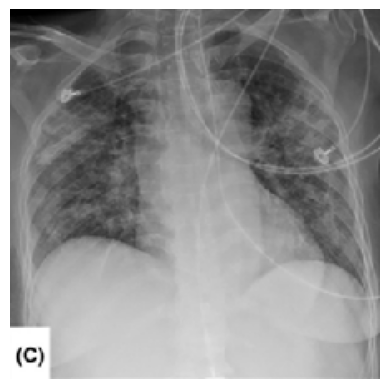

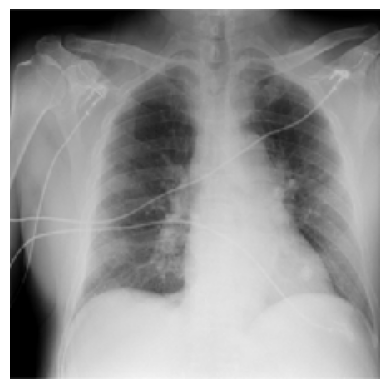

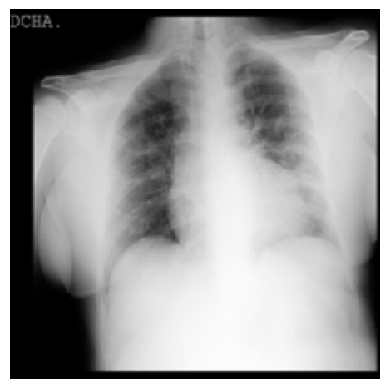

In [ ]:
# List all files in the directory

t_path='/content/drive/MyDrive/master/Dataset/VGG16-Dataset/train/COVID'
file_list = os.listdir(t_path)

# Select 3 images from the list
selected_images = file_list[:3]

# Display the selected images
for img_name in selected_images:
    img_path = os.path.join(t_path, img_name)

    # Load the image
    img = image.load_img(img_path, target_size=(224,224))

    # Display the image
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Found 5970 images belonging to 3 classes.


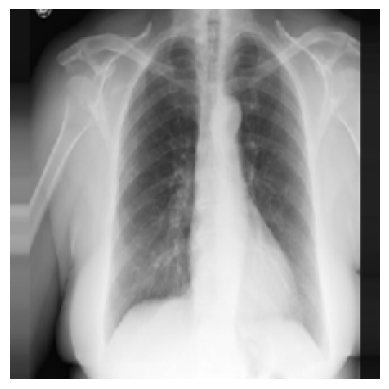

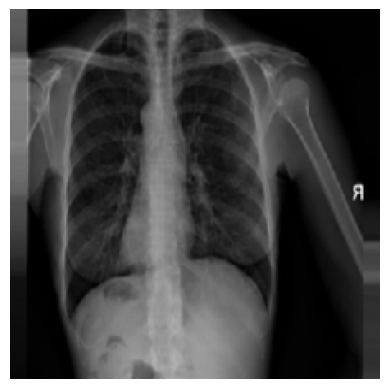

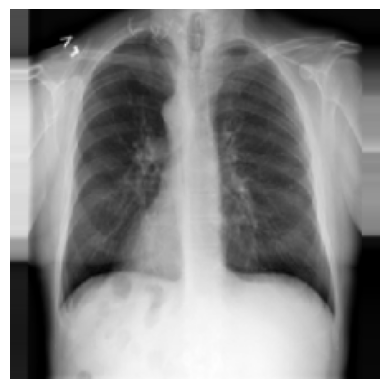

In [ ]:
#imag
train_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)


#//////////////////////

# Create a generator using flow_from_directory
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),  # specify the target size of your images
    batch_size=32,  # specify the batch size
    class_mode='categorical'  # specify the class mode
)

# Plot 3 samples
num_samples = 3
for i in range(num_samples):
    # Get a batch of data
    batch = train_generator.next()

    # Display the first image from the batch
    img = image.array_to_img(batch[0][0])
    plt.imshow(img)
    plt.axis('off')
    plt.show()

Processing images in: COVID


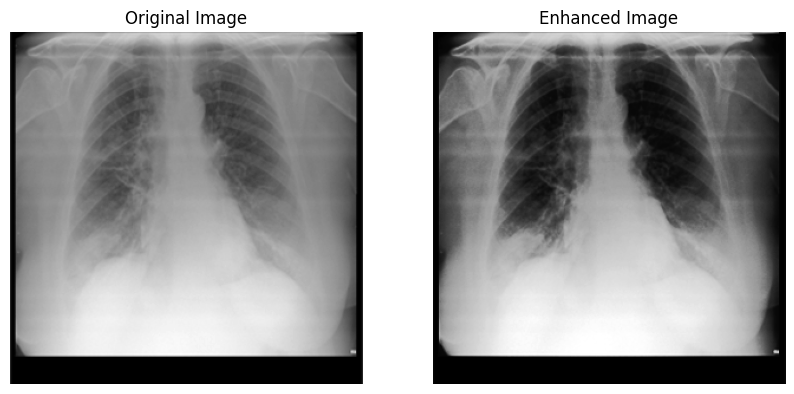

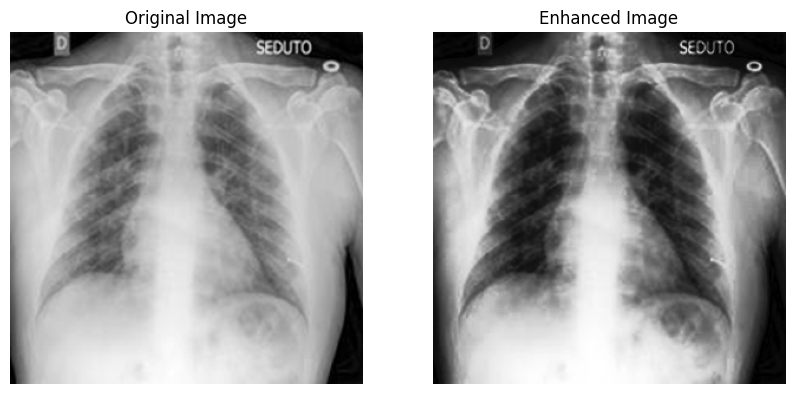

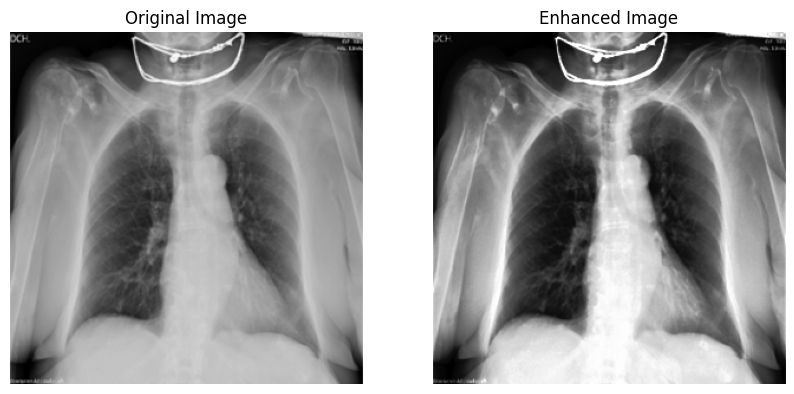

Processing images in: Normal


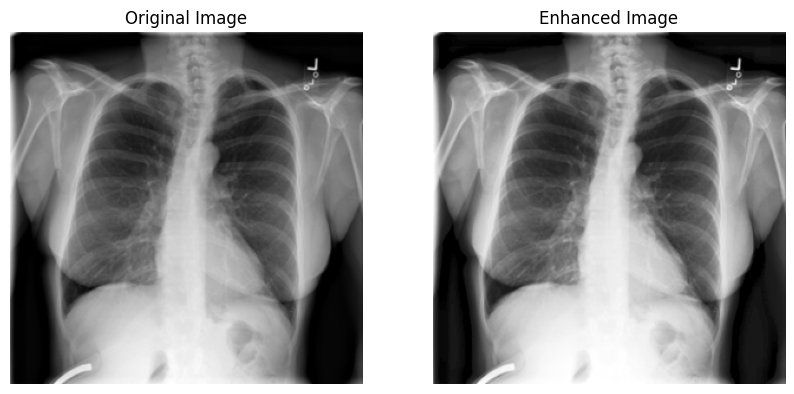

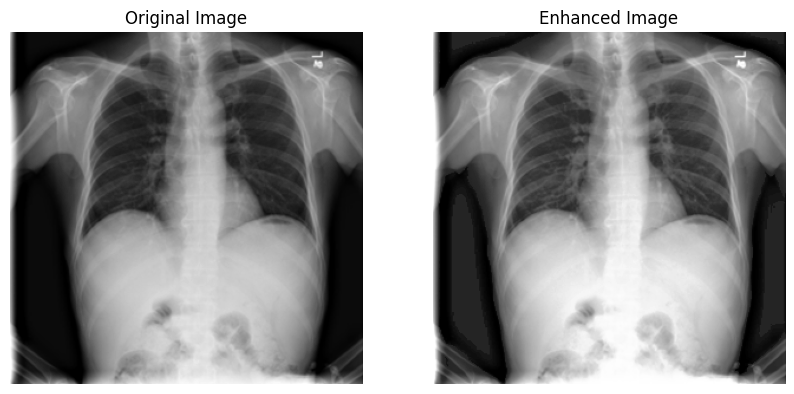

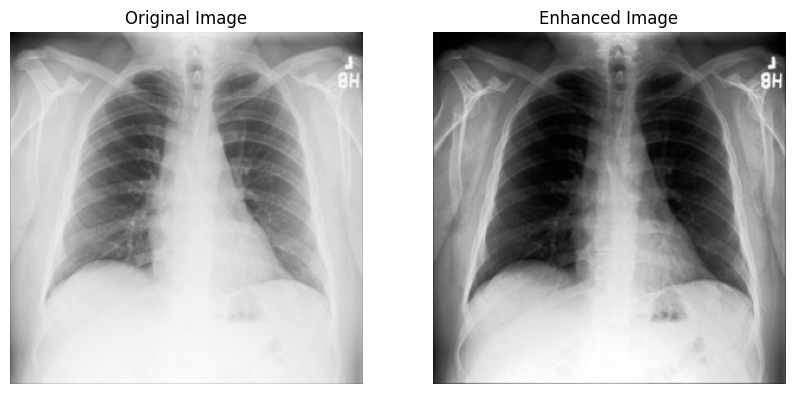

Processing images in: Viral Pneumonia


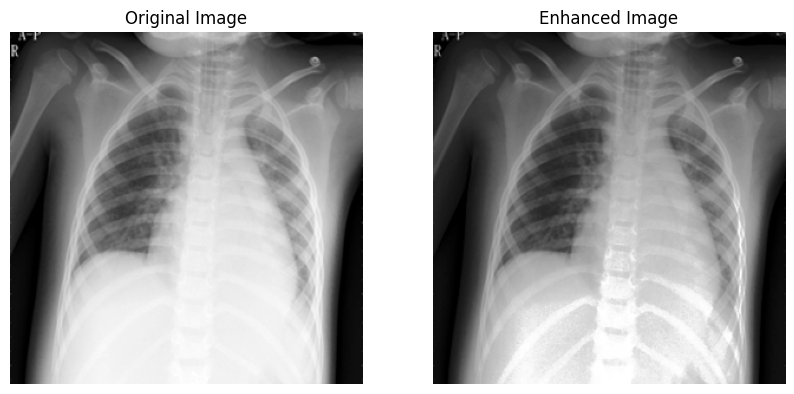

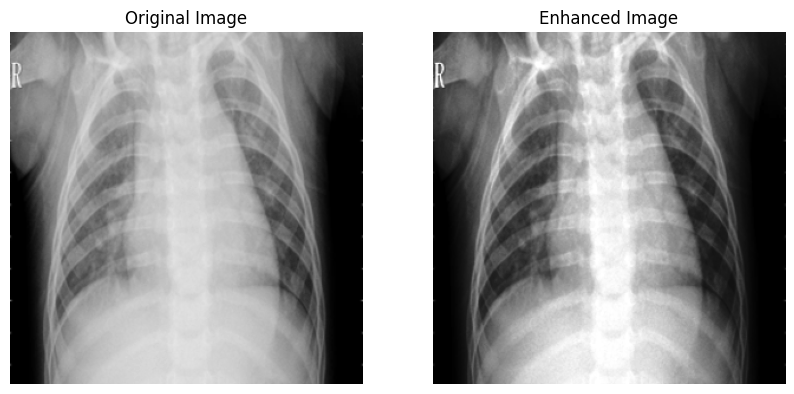

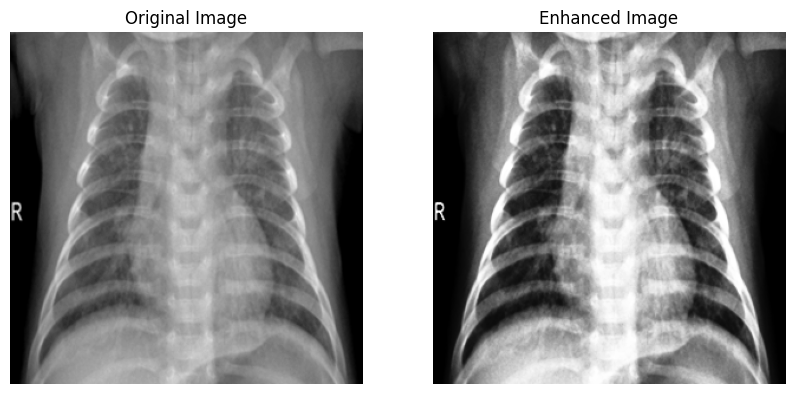

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Define the path to your dataset
train_path = '/content/drive/MyDrive/master/Dataset/VGG16-Dataset/train'

# Function to apply histogram equalization to an image
def enhance_image(image):
    return cv2.equalizeHist(image)

# Loop through each subdirectory in the main directory
for class_folder in os.listdir(train_path):
    class_folder_path = os.path.join(train_path, class_folder)

    # Check if it is a directory
    if os.path.isdir(class_folder_path):
        print(f"Processing images in: {class_folder}")

        # Get a list of image files in the subdirectory
        image_files = [filename for filename in os.listdir(class_folder_path) if filename.lower().endswith(('.jpg', '.png'))]

        # Select 3 random sample images
        sample_images = random.sample(image_files, min(3, len(image_files)))

        for sample_image in sample_images:
            # Load the original image
            original_image_path = os.path.join(class_folder_path, sample_image)
            original_image = cv2.imread(original_image_path, 0)  # Read the image in grayscale

            # Display the original image
            plt.figure(figsize=(10, 5))
            plt.subplot(1, 2, 1)
            plt.imshow(original_image, cmap='gray')
            plt.title('Original Image')
            plt.axis('off')

            # Apply histogram equalization
            enhanced_image = enhance_image(original_image)

            # Display the enhanced image
            plt.subplot(1, 2, 2)
            plt.imshow(enhanced_image, cmap='gray')
            plt.title('Enhanced Image')
            plt.axis('off')

            plt.show()


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Define the path to your dataset
train_path = '/content/drive/MyDrive/master/Dataset/VGG16-Dataset/train'

# Define the path for the new folder to store enhanced images
enhanced_train_path = '/content/drive/MyDrive/master/enhancedDataset/enhanced_train_dataset'
enhanced_covid= '/content/drive/MyDrive/master/enhancedDataset/enhanced_train_dataset/COVID'
enhanced_pneumonia= '/content/drive/MyDrive/master/enhancedDataset/enhanced_train_dataset/Viral Pneumonia'
enhanced_normal= '/content/drive/MyDrive/master/enhancedDataset/enhanced_train_dataset/Normal'
# Create the new folder if it doesn't exist
os.makedirs(enhanced_train_path, exist_ok=True)

# Function to apply histogram equalization to an image
def enhance_image(image, filename):
    enhanced_image = cv2.equalizeHist(image)
    #print(filename)
    if "COVID" in filename:
      #print("The image filename contains the word 'covid'")
      enhanced_filename = os.path.join(enhanced_covid, 'enhanced_' + filename)
    elif "Normal" in filename:
      enhanced_filename = os.path.join(enhanced_normal, 'enhanced_' + filename)
    else:
      enhanced_filename = os.path.join(enhanced_pneumonia, 'enhanced_' + filename)

    #enhanced_filename = os.path.join(enhanced_path, 'enhanced_' + filename)
    cv2.imwrite(enhanced_filename, enhanced_image)
    return enhanced_filename

# Loop through each subdirectory in the main directory
for class_folder in os.listdir(train_path):
    class_folder_path = os.path.join(train_path, class_folder)

    # Check if it is a directory
    if os.path.isdir(class_folder_path):
        print(f"Processing images in: {class_folder}")

        # Get a list of image files in the subdirectory
        image_files = [filename for filename in os.listdir(class_folder_path) if filename.lower().endswith(('.jpg', '.png'))]

        for image_file in image_files:
            # Load the original image
            original_image_path = os.path.join(class_folder_path, image_file)
            original_image = cv2.imread(original_image_path, 0)  # Read the image in grayscale

            # Apply histogram equalization and save the enhanced image
            enhanced_filename = enhance_image(original_image, image_file)

            print(f"Enhanced image saved at: {enhanced_filename}")

print("All done.")


Streaming output truncated to the last 5000 lines.
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_train_dataset/COVID/enhanced_COVID-1216.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_train_dataset/COVID/enhanced_COVID-2383.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_train_dataset/COVID/enhanced_COVID-2917.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_train_dataset/COVID/enhanced_COVID-1294.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_train_dataset/COVID/enhanced_COVID-276.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_train_dataset/COVID/enhanced_COVID-364.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_train_dataset/COVID/enhanced_COVID-2285.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_tra

In [ ]:
training_set=train_datagen.flow_from_directory(
    directory=enhanced_train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)


Found 5970 images belonging to 3 classes.


In [ ]:
test_datagen=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Define the path to your dataset
train_path = '/content/drive/MyDrive/master/Dataset/VGG16-Dataset/test'

# Define the path for the new folder to store enhanced images
enhanced_test_path = '/content/drive/MyDrive/master/enhancedDataset/enhanced_testing_dataset'
enhanced_covid= '/content/drive/MyDrive/master/enhancedDataset/enhanced_testing_dataset/COVID'
enhanced_pneumonia= '/content/drive/MyDrive/master/enhancedDataset/enhanced_testing_dataset/Viral Pneumonia'
enhanced_normal= '/content/drive/MyDrive/master/enhancedDataset/enhanced_testing_dataset/Normal'
# Create the new folder if it doesn't exist
os.makedirs(enhanced_test_path, exist_ok=True)

# Function to apply histogram equalization to an image
def enhance_image(image, filename):
    enhanced_image = cv2.equalizeHist(image)
   # print(filename)
    if "COVID" in filename:
      #print("The image filename contains the word 'covid'")
      enhanced_filename = os.path.join(enhanced_covid, 'enhanced_' + filename)
    elif "Normal" in filename:
      enhanced_filename = os.path.join(enhanced_normal, 'enhanced_' + filename)
    else:
      enhanced_filename = os.path.join(enhanced_pneumonia, 'enhanced_' + filename)

    #enhanced_filename = os.path.join(enhanced_path, 'enhanced_' + filename)
    cv2.imwrite(enhanced_filename, enhanced_image)
    return enhanced_filename

# Loop through each subdirectory in the main directory
for class_folder in os.listdir(train_path):
    class_folder_path = os.path.join(train_path, class_folder)

    # Check if it is a directory
    if os.path.isdir(class_folder_path):
        print(f"Processing images in: {class_folder}")

        # Get a list of image files in the subdirectory
        image_files = [filename for filename in os.listdir(class_folder_path) if filename.lower().endswith(('.jpg', '.png'))]

        for image_file in image_files:
            # Load the original image
            original_image_path = os.path.join(class_folder_path, image_file)
            original_image = cv2.imread(original_image_path, 0)  # Read the image in grayscale

            # Apply histogram equalization and save the enhanced image
            enhanced_filename = enhance_image(original_image, image_file)

            print(f"Enhanced image saved at: {enhanced_filename}")

print("All done.")


Processing images in: COVID
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_testing_dataset/COVID/enhanced_COVID-2085.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_testing_dataset/COVID/enhanced_COVID-750.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_testing_dataset/COVID/enhanced_COVID-176.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_testing_dataset/COVID/enhanced_COVID-634.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_testing_dataset/COVID/enhanced_COVID-2761.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_testing_dataset/COVID/enhanced_COVID-2024.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_testing_dataset/COVID/enhanced_COVID-269.png
Enhanced image saved at: /content/drive/MyDrive/master/enhancedDataset/enhanced_testing_datase

In [ ]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
'''

# Step 1: Preprocess the enhanced images
enhanced_testing_dataset_path = '/content/drive/MyDrive/master/Dataset/VGG16-Dataset/enhanced_testing_dataset'

enhanced_testing_images = []
labels = []

for class_folder in os.listdir(enhanced_testing_dataset_path):
    class_folder_path = os.path.join(enhanced_testing_dataset_path, class_folder)

    if os.path.isdir(class_folder_path):
        for filename in os.listdir(class_folder_path):
            img_path = os.path.join(class_folder_path, filename)
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)
            img_array = preprocess_input(img_array)
            enhanced_testing_images.append(img_array)
            labels.append(class_folder)

enhanced_testing_images = np.array(enhanced_testing_images)
labels = np.array(labels)
'''

# Step 2: Load the VGG16 model
#base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Step 3: Extract features from enhanced images using VGG16
#enhanced_features = base_model.predict(enhanced_images)

# Step 4: Train a classifier on top of VGG16 features
# Flatten the features and add a Dense layer for classification
#x = GlobalAveragePooling2D()(enhanced_features)
#x = Dense(256, activation='relu')(x)
#predictions = Dense(num_classes, activation='softmax')(x)

# Create a new model with VGG16 base and the classifier
#model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
#model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
#history = model.fit(enhanced_images, labels, epochs=5, validation_split=0.2)


"\n\n# Step 1: Preprocess the enhanced images\nenhanced_testing_dataset_path = '/content/drive/MyDrive/master/Dataset/VGG16-Dataset/enhanced_testing_dataset'\n\nenhanced_testing_images = []\nlabels = []\n\nfor class_folder in os.listdir(enhanced_testing_dataset_path):\n    class_folder_path = os.path.join(enhanced_testing_dataset_path, class_folder)\n\n    if os.path.isdir(class_folder_path):\n        for filename in os.listdir(class_folder_path):\n            img_path = os.path.join(class_folder_path, filename)\n            img = image.load_img(img_path, target_size=(224, 224))\n            img_array = image.img_to_array(img)\n            img_array = preprocess_input(img_array)\n            enhanced_testing_images.append(img_array)\n            labels.append(class_folder)\n\nenhanced_testing_images = np.array(enhanced_testing_images)\nlabels = np.array(labels)\n"

In [ ]:
#import the images from the test dataset.

test_set=test_datagen.flow_from_directory(
    directory=enhanced_test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1991 images belonging to 3 classes.


In [ ]:
#import the VGG 16 library as shown below and add preprocessing layer to the front of VGG
#here we will be using imagenet weights

vgg = VGG16(input_shape=img_size+[3], weights='imagenet', include_top=False)

In [ ]:
#don't train existing weights
for layer in vgg.layers:
    layer.trainable=False

In [ ]:
#our layers - you can add more if you want
x=Flatten()(vgg.output)

prediction=Dense(no_classes, activation='softmax')(x)


In [ ]:
#create a model object
model=Model(inputs=vgg.input, outputs=prediction)

In [ ]:

model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
#tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
import tensorflow as tf

In [ ]:
#fit the model
#history=model.fit(
#    training_set,
 #   validation_data=test_set,
 #   epochs=5,
 #   steps_per_epoch=len(training_set),
 #   validation_steps=len(test_set)
  #  )
history=model.fit(
    training_set,
    validation_data=test_set,
    epochs=5,
    steps_per_epoch=len(training_set),
    validation_steps=len(test_set)
    )

Epoch 1/5
187/187 [==============================] - 4766s 26s/step - loss: 0.4490 - accuracy: 0.8144 - val_loss: 0.2907 - val_accuracy: 0.8835
Epoch 2/5
187/187 [==============================] - 4551s 24s/step - loss: 0.2785 - accuracy: 0.8868 - val_loss: 0.3081 - val_accuracy: 0.8694
Epoch 3/5
187/187 [==============================] - 4591s 25s/step - loss: 0.2505 - accuracy: 0.8995 - val_loss: 0.2372 - val_accuracy: 0.9056
Epoch 4/5
187/187 [==============================] - 4527s 24s/step - loss: 0.2270 - accuracy: 0.9101 - val_loss: 0.2794 - val_accuracy: 0.9021
Epoch 5/5
187/187 [==============================] - 4556s 24s/step - loss: 0.2093 - accuracy: 0.9184 - val_loss: 0.1911 - val_accuracy: 0.9272


In [ ]:
#generate Validation set
validation_datagen=ImageDataGenerator()



In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import random

# Define the path to your dataset
train_path = '/content/drive/MyDrive/master/Dataset/VGG16-Dataset/val'

# Define the path for the new folder to store enhanced images
enhanced_val_path = '/content/drive/MyDrive/master/enhancedDataset/enhanced_val_dataset'
enhanced_covid= '/content/drive/MyDrive/master/enhancedDataset/enhanced_val_dataset/COVID'
enhanced_pneumonia= '/content/drive/MyDrive/master/enhancedDataset/enhanced_val_dataset/Viral Pneumonia'
enhanced_normal= '/content/drive/MyDrive/master/enhancedDataset/enhanced_val_dataset/Normal'
# Create the new folder if it doesn't exist
os.makedirs(enhanced_test_path, exist_ok=True)

# Function to apply histogram equalization to an image
def enhance_image(image, filename):
    enhanced_image = cv2.equalizeHist(image)
    print(filename)
    if "COVID" in filename:
      #print("The image filename contains the word 'covid'")
      enhanced_filename = os.path.join(enhanced_covid, 'enhanced_' + filename)
    elif "Normal" in filename:
      enhanced_filename = os.path.join(enhanced_normal, 'enhanced_' + filename)
    else:
      enhanced_filename = os.path.join(enhanced_pneumonia, 'enhanced_' + filename)

    #enhanced_filename = os.path.join(enhanced_path, 'enhanced_' + filename)
    cv2.imwrite(enhanced_filename, enhanced_image)
    return enhanced_filename

# Loop through each subdirectory in the main directory
for class_folder in os.listdir(train_path):
    class_folder_path = os.path.join(train_path, class_folder)

    # Check if it is a directory
    if os.path.isdir(class_folder_path):
        print(f"Processing images in: {class_folder}")

        # Get a list of image files in the subdirectory
        image_files = [filename for filename in os.listdir(class_folder_path) if filename.lower().endswith(('.jpg', '.png'))]

        for image_file in image_files:
            # Load the original image
            original_image_path = os.path.join(class_folder_path, image_file)
            original_image = cv2.imread(original_image_path, 0)  # Read the image in grayscale

            # Apply histogram equalization and save the enhanced image
            enhanced_filename = enhance_image(original_image, image_file)

            #print(f"Enhanced image saved at: {enhanced_filename}")

print("All done.")


In [ ]:
validation_set=validation_datagen.flow_from_directory(
    directory=enhanced_val_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1990 images belonging to 3 classes.


In [ ]:
#just capture the loss and accuray into val variable
validation_steps=20

loss,accuracy=model.evaluate(validation_set, steps=validation_steps)

print("loss: {:.2f}".format(loss))
print("accuracy: {:.2f}".format(accuracy))

20/20 [==============================] - 356s 18s/step - loss: 29.9197 - accuracy: 0.7000
loss: 29.92
accuracy: 0.70


In [ ]:

model.save('/content/drive/MyDrive/master/enhanedDataset/CPN_Model3_VGG16.h5')
#model.save('/content/drive/MyDrive/X-ray_Dataset/Dataset/VGG16-Dataset/CPN_Model_VGG16.keras')

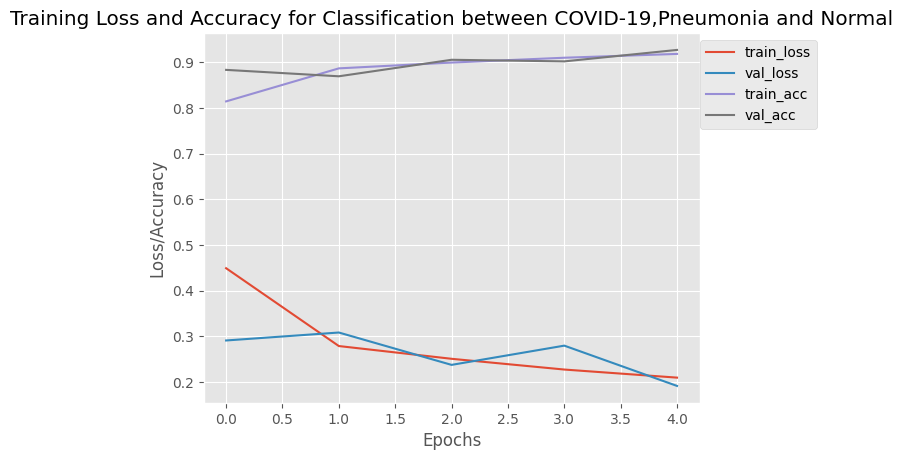

In [ ]:
#loss/accuracy graph
n=no_epochs
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, n), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, n), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, n), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, n), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy for Classification between COVID-19,Pneumonia and Normal")
plt.xlabel("Epochs")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="upper right", bbox_to_anchor=(1.25, 1))
#plt.savefig("plot1.png")

In [ ]:
#to check test accuacy
modelLoss, modelAccuracy=model.evaluate(test_set, verbose=0)

print('Test Loss is: {}'.format(modelLoss))
print('Test Accuracy is: {}'.format(modelAccuracy ))

Test Loss is: 0.2064027637243271
Test Accuracy is: 0.922149658203125


In [ ]:
#loading the model
from tensorflow import keras
model=keras.models.load_model('/content/drive/MyDrive/master/CPN_Model3_VGG16.h5')

In [ ]:
#get sample image to test
img_normal=image.load_img('/content/drive/MyDrive/master/Dataset/VGG16-Dataset/test/Normal/Normal-1003.png', target_size=(224, 224))
img_pneumonia=image.load_img('/content/drive/MyDrive/master/Dataset/VGG16-Dataset/test/Viral Pneumonia/Viral Pneumonia-1004.png', target_size=(224, 224))
img_covid=image.load_img('/content/drive/MyDrive/master/Dataset/VGG16-Dataset/test/COVID/COVID-10.png', target_size=(224, 224))

In [ ]:
def model_predict(img, actual):
    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    result=model.predict(x)
    index = np.argmax(result,axis=1)
    if index==0:
       result="covid-19"
    elif index==1:
       result="normal"
    else:
       result="pneumonia"

    plt.figure()
    plt.imshow(img)
    plt.title('Actual : {} --> Predicted  : {}'.format(actual, result))

1/1 [==============================] - 1s 791ms/step


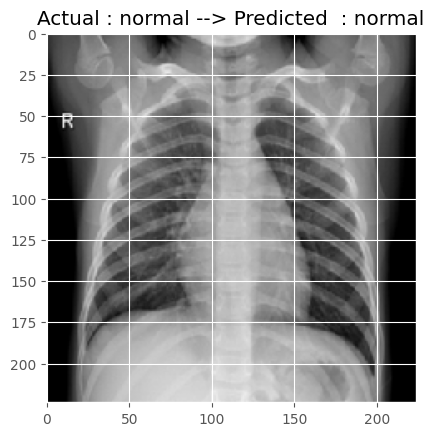

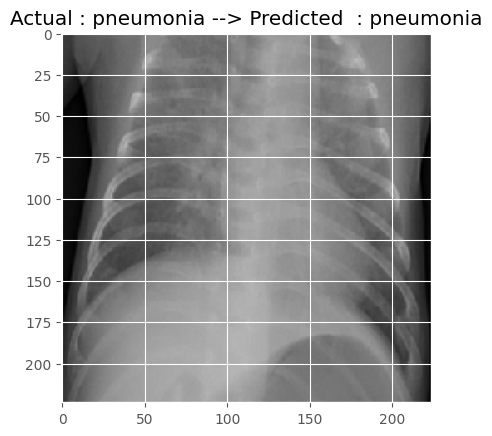

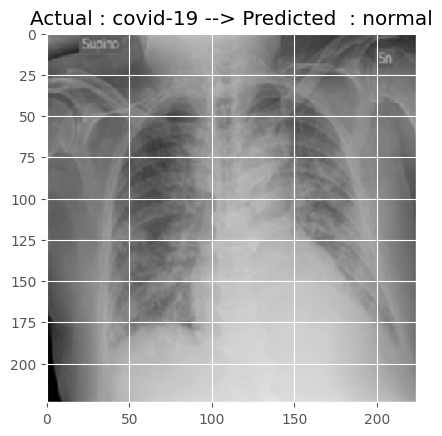

In [ ]:
pred_normal=model_predict(img_normal, "normal")
pred_pneumonia=model_predict(img_pneumonia, "pneumonia")
pred_covid=model_predict(img_covid, "covid-19")